In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/onlinefoods.csv")
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
df.rename(columns={"Monthly Income":"Income"},inplace = True)

In [4]:
df.shape

(388, 13)

In [7]:
for i in df.columns:
    print(i,df[i].unique())
    print(i,df[i].nunique())
    print('-----------------------------------')

Age [20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
Age 16
-----------------------------------
Gender ['Female' 'Male']
Gender 2
-----------------------------------
Marital Status ['Single' 'Married' 'Prefer not to say']
Marital Status 3
-----------------------------------
Occupation ['Student' 'Employee' 'Self Employeed' 'House wife']
Occupation 4
-----------------------------------
Income ['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
Income 5
-----------------------------------
Educational Qualifications ['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
Educational Qualifications 5
-----------------------------------
Family size [4 3 6 2 5 1]
Family size 6
-----------------------------------
latitude [12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0

In [8]:
df.drop(['Unnamed: 12'],axis =1, inplace =True)

In [9]:
df.drop(['Output'],axis =1, inplace =True)

In [10]:
df

,Age,Gender,Marital Status,Occupation,Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive
...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Positive


In [11]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


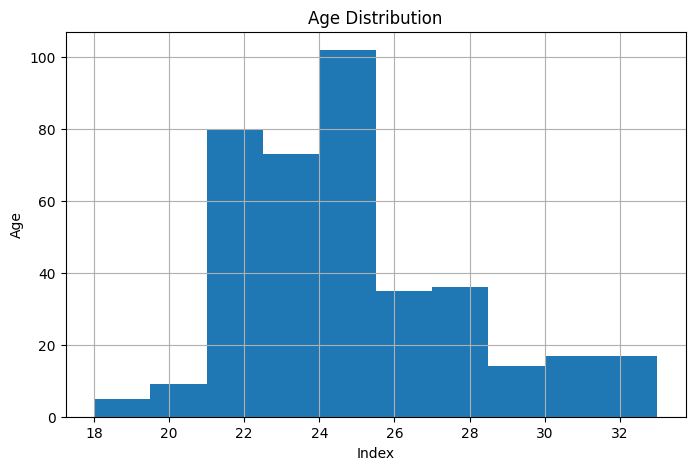

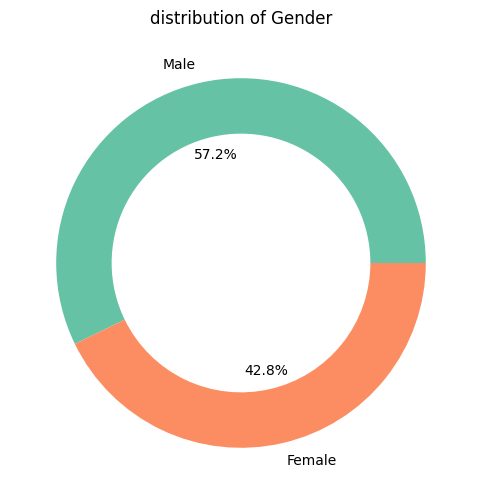

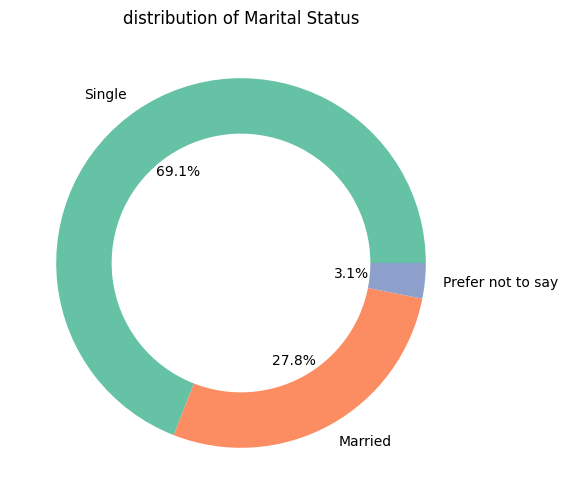

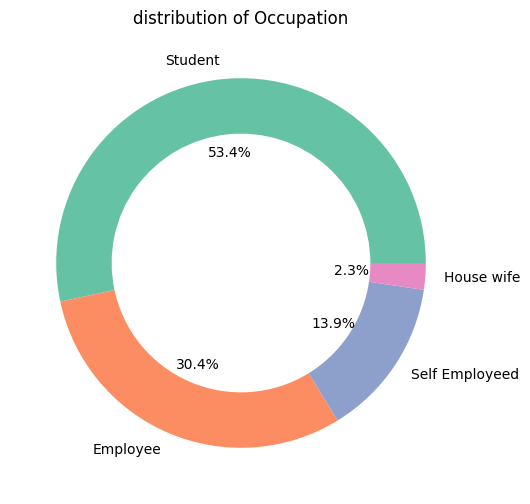

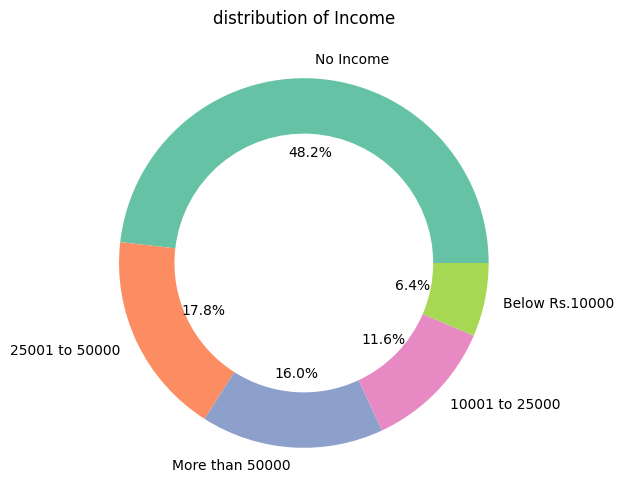

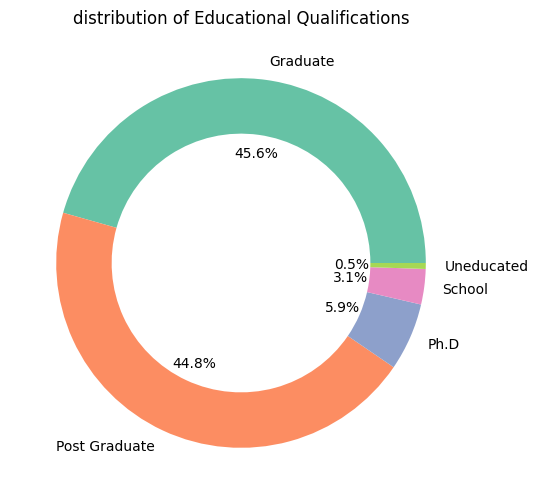

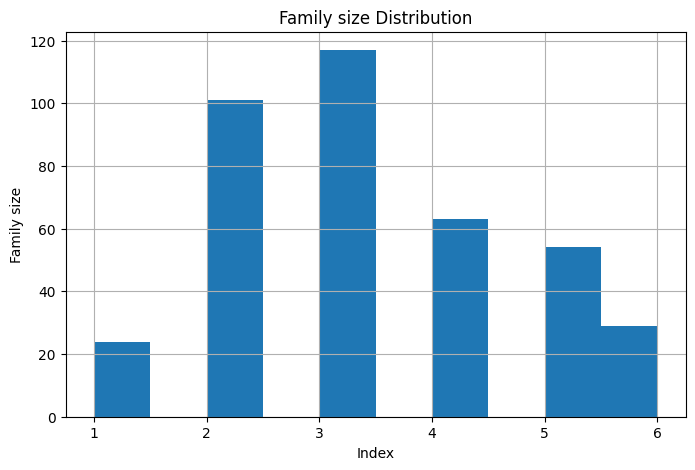

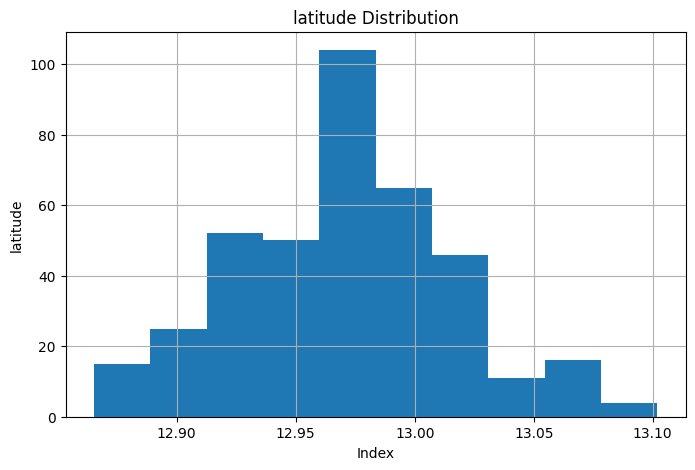

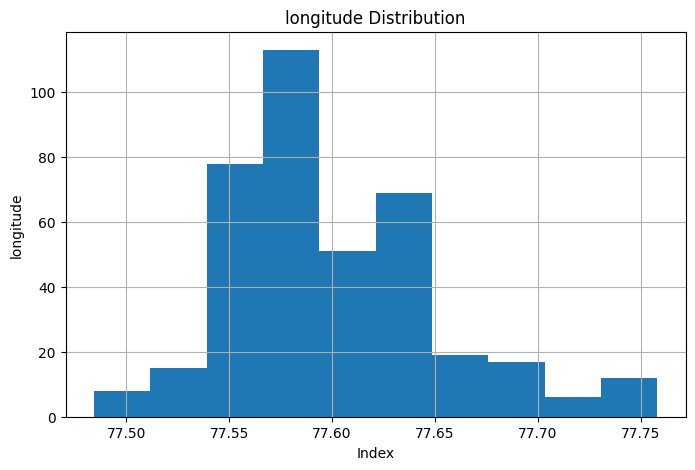

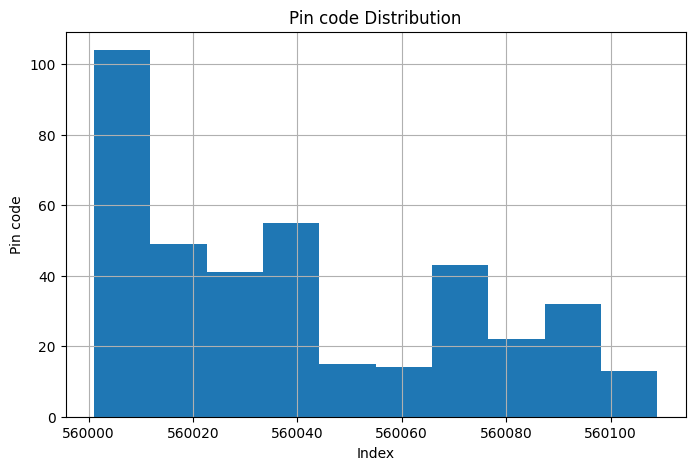

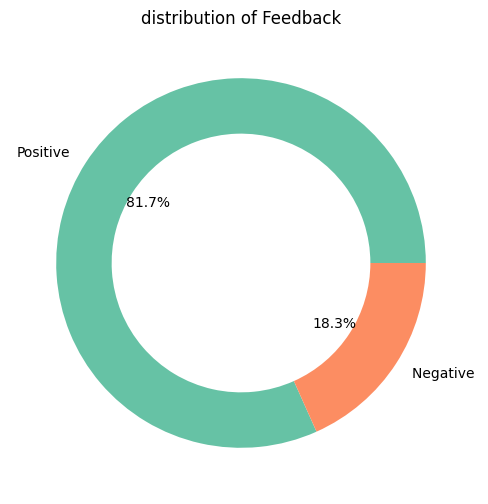

In [12]:
def plot_pie(column):
  plt.figure(figsize=(6,6))
  df[column].value_counts().head(10).plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2'), wedgeprops = dict(width = 0.3))
  plt.title(f'distribution of {column}')
  plt.ylabel('')
  plt.savefig(f'distribution of {column}.png')
  plt.show()


def plot_hist(column):
  plt.figure(figsize=(8, 5))
  df[column].hist()
  plt.title(f'{column} Distribution')
  plt.xlabel('Index')
  plt.ylabel(column)
  plt.savefig(f'distribution of {column}.png')
  plt.show()

for col in df.columns:
  if df[col].dtype == "object":
    plot_pie(col)
    print("\n\n")

  else:
    plot_hist(col)
    print("\n\n")




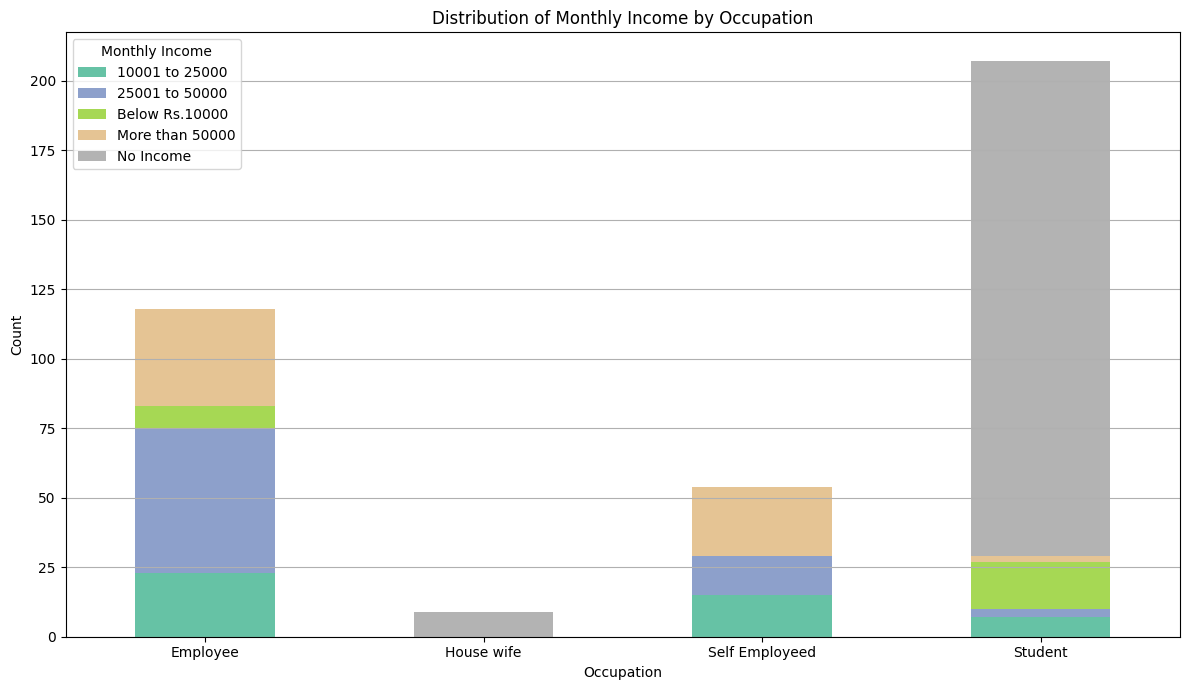

In [13]:
group1 = df.groupby(['Occupation', 'Income']).size().unstack(fill_value=0)
group1.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')
plt.title('Distribution of Monthly Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Monthly Income')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("Distribution of Monthly Income by Occupation.png")
plt.show()

In [16]:
df["Income"].unique()

array([    0,  5000, 50000, 17500, 37500])

In [15]:
df["Income"].replace({'No Income':0,'Below Rs.10000':5000,'More than 50000':50000,'10001 to 25000':17500,'25001 to 50000':37500},inplace = True)

In [17]:
#average income by gender
avg_income = df.groupby('Gender').Income.mean()
avg_income

Gender
Female    14051.204819
Male      19222.972973
Name: Income, dtype: float64

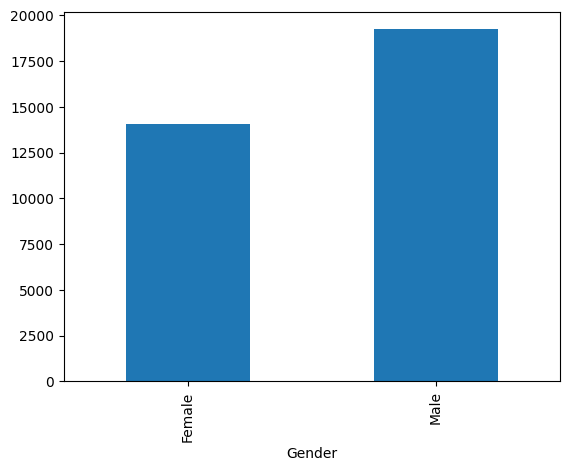

In [18]:
avg_income.plot(kind = 'bar')
plt.savefig("avg_income.png")

In [19]:
work_by_gender=df.groupby("Gender").Occupation

work_by_gender.value_counts()

Gender  Occupation    
Female  Student            92
        Employee           49
        Self Employeed     16
        House wife          9
Male    Student           115
        Employee           69
        Self Employeed     38
Name: count, dtype: int64

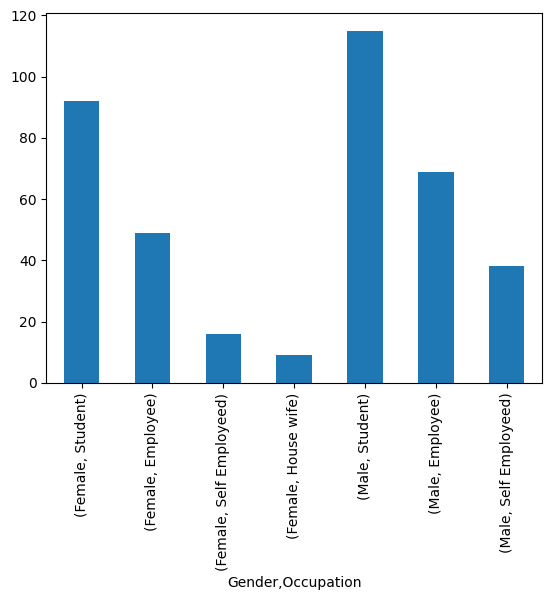

In [20]:
work_by_gender.value_counts().plot(kind='bar')
plt.savefig("workbygender.png")

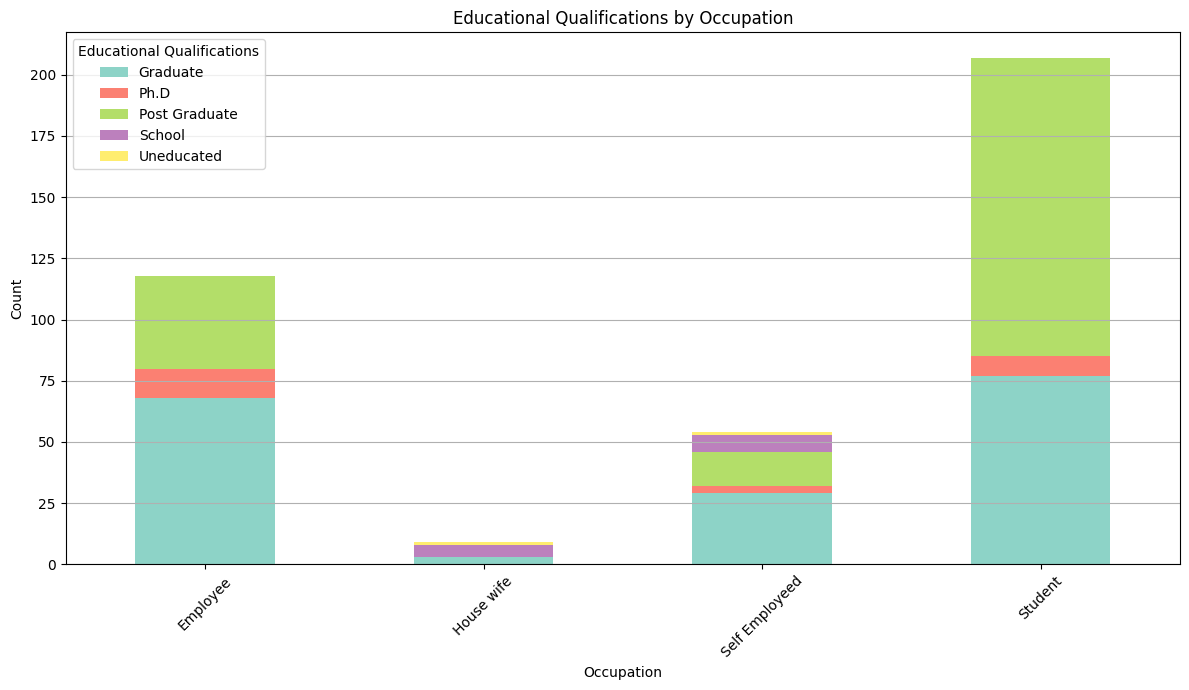

In [21]:

occupation_education = df.groupby(['Occupation', 'Educational Qualifications']).size().unstack(fill_value=0)
occupation_education.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Educational Qualifications by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Educational Qualifications')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("Eduqual.png")
plt.show()